In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

# 1. Load multiple grayscale face images (Olivetti Faces dataset)

In [2]:
faces = fetch_olivetti_faces()
images = faces.images   # shape = (400, 64, 64)
data = faces.data       # shape = (400, 4096) → flattened vectors

print("Dataset shape:", data.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Admin\scikit_learn_data
Dataset shape: (400, 4096)


# 2. Standardize the data (mean centering)

In [3]:
mean_face = np.mean(data, axis=0)
centered_data = data - mean_face

# 3. Compute PCA (Eigen decomposition)

In [4]:
n_components = 16  # number of eigenfaces to visualize
pca = PCA(n_components=n_components, whiten=True)
pca.fit(centered_data)

eigenfaces = pca.components_.reshape((n_components, 64, 64))

# 4. Visualize the mean face

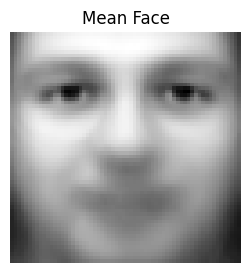

In [5]:
plt.figure(figsize=(3,3))
plt.title("Mean Face")
plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.axis('off')
plt.show()

# 5. Visualize top eigenfaces (principal components)

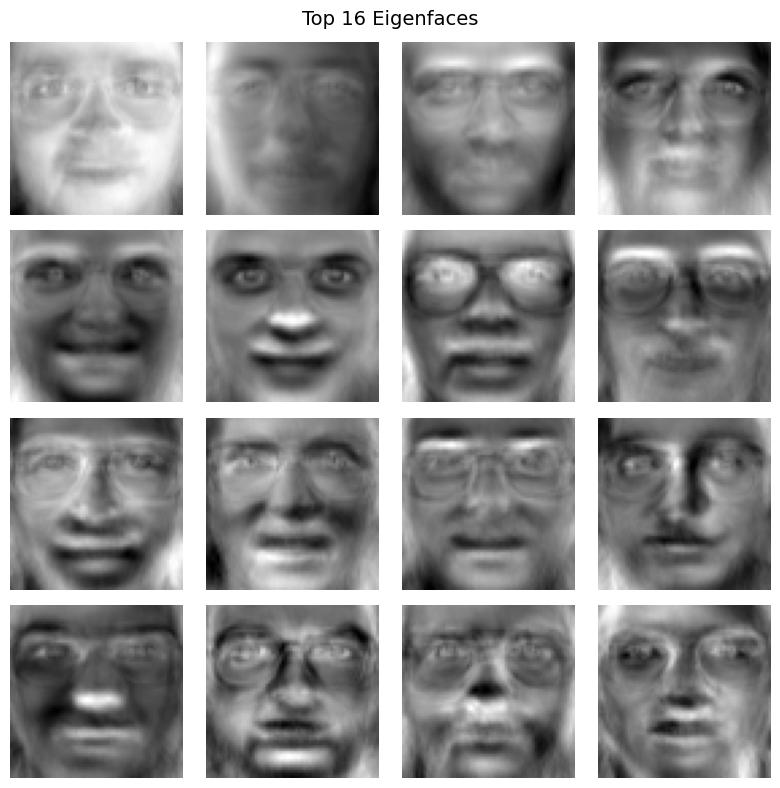

In [6]:
plt.figure(figsize=(8, 8))
plt.suptitle("Top 16 Eigenfaces", fontsize=14)

for i in range(n_components):
    plt.subplot(4, 4, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Explained variance

In [7]:
print("Explained variance ratio (sum of top 16 components):",
      np.sum(pca.explained_variance_ratio_))

Explained variance ratio (sum of top 16 components): 0.73100483
